evaluation on simplebooll5. validation score > 89%

In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-largeSimpleBoolean5.pkl"
VALIDATION_DATA = "../expressions-synthetic/split/largeSimpleBoolean5-validationset.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [10]:
def get_false():
    """The default representation for false expression."""
    return [item['expression'] for item in flat if item['expression'][0] == ['(', '~', 'f', ')', '&', 'f']][0]
get_false()

(['(', '~', 'f', ')', '&', 'f'], <data.tree.Node at 0x114ce37b8>)

In [11]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.04942775,  0.1650732 ,  0.11215395,  0.02334074,  0.10059218,
       -0.0219946 ,  0.15261845,  0.20703824,  0.02334916,  0.08055183,
        0.19195132,  0.0841417 ,  0.08397593, -0.04508496,  0.01145305,
        0.01895658, -0.2853938 , -0.02817955, -0.13220286,  0.19343784,
        0.08070412,  0.08404835, -0.10933224, -0.0160099 , -0.08224559,
       -0.03283206,  0.15140437,  0.04926695, -0.14390448,  0.10165198,
       -0.06351563, -0.07251281,  0.00664478, -0.08387507, -0.01527643,
        0.18150534, -0.15054958,  0.09224853, -0.16079065,  0.02697216,
        0.12543777, -0.07997072, -0.00040159, -0.1377802 ,  0.23204972,
       -0.03069704, -0.04783073, -0.24476339, -0.00092624,  0.12380704,
        0.00579404,  0.06168797, -0.12028129,  0.11163394,  0.03738014,
        0.2198567 ,  0.0164345 , -0.12300172, -0.2540927 , -0.00289715,
       -0.02155358, -0.33593434, -0.08176974,  0.17753527], dtype=float32)

In [12]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [13]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [14]:
pandas.set_option('max_rows', 200)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.138010,"And(d, e, f)","[(, f, &, e, ), &, d]"
1,1.406119,"Or(b, h)","[h, |, (, ~, (, ~, b, ), )]"
2,1.418682,"Or(b, h)","[b, |, (, b, |, h, )]"
3,1.508134,"Or(b, h)","[(, h, |, b, ), |, h]"
4,1.346479,"And(e, j)","[(, j, &, e, ), &, e]"
5,1.327866,"And(e, j)","[(, ~, (, ~, e, ), ), &, j]"
6,1.391814,"And(e, j)","[e, &, (, j, &, e, )]"
7,1.278898,"Or(c, e)","[(, c, &, c, ), |, e]"
8,1.181432,"Or(c, e)","[c, |, (, c, |, e, )]"
9,1.183143,"Or(c, e)","[(, e, |, c, ), |, c]"


In [15]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

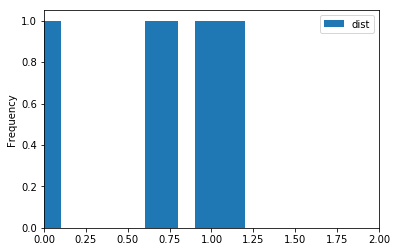

In [16]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

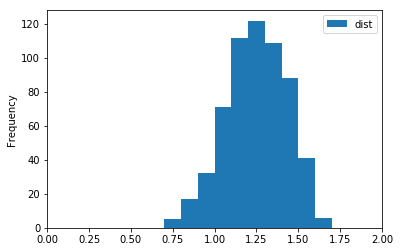

In [17]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))